In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from adjustText import adjust_text
%matplotlib inline

In [20]:
df = pd.read_csv('../data/EPL 19-20 outfield_colR.csv')
df1 = pd.read_csv('../data/EFL 19-20 outfield_colR.csv')
pd.set_option('display.max_columns', None)

In [21]:
df = pd.concat([df, df1], axis=0)

In [22]:
# Filter for Midfielders
mask = (df.position == 'Forward')
df = df.loc[mask]

In [23]:
players = df['player'].tolist()

In [24]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot', 'mins_played', 'nineties'], axis=1)

In [25]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [26]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [27]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [28]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [29]:
clusters_df

,num_clusters,cluster_errors
0,1,239.362287
1,2,129.714299
2,3,86.636334
3,4,67.667375
4,5,52.292498
5,6,43.655575
6,7,35.780276
7,8,30.072401
8,9,25.135123
9,10,22.346812


In [30]:
# sns.set(style="white")
# plt.figure(figsize=(12,6))
# plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
# plt.tick_params(labelsize=15)

# plt.xlabel("Clusters", fontsize=20)
# plt.ylabel("Sum of squared errors", fontsize=20)

In [31]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [32]:
transformed['cluster'] = clusters

In [33]:
players

['Anthony Martial',
 'Marcus Rashford',
 'Mason Greenwood',
 'Pierre-Emerick Aubameyang',
 'Nicolas Pépé',
 'Alexandre Lacazette',
 'Bukayo Saka',
 'Gabriel Martinelli',
 'Joelinton',
 'Allan Saint-Maximin',
 'Andy Carroll',
 'Harry Kane',
 'Son Heung-Min',
 'Wesley',
 'Tammy Abraham',
 'Willian',
 'Callum Hudson-Odoi',
 'Pedro',
 'Richarlison',
 'Dominic Calvert-Lewin',
 'Alex Iwobi',
 'Theo Walcott',
 'Bernard',
 'Moise Kean',
 'Jamie Vardy',
 'Ayoze Pérez',
 'Kelechi Iheanacho',
 'Roberto Firmino',
 'Mohamed Salah',
 'Sadio Mané',
 'Divock Origi',
 'Danny Ings',
 'Shane Long',
 'Che Adams',
 'Sébastien Haller',
 'Andriy Yarmolenko',
 'Wilfried Zaha',
 'Jordan Ayew',
 'Christian Benteke',
 'Neal Maupay',
 'Steven Alzate',
 'Aaron Connolly',
 'Glenn Murray',
 'Raúl Jiménez',
 'Adama Traoré',
 'Diogo Jota',
 'Pedro Neto',
 'Raheem Sterling',
 'Sergio Agüero',
 'Riyad Mahrez',
 'Gabriel Jesus',
 'Teemu Pukki',
 'Oliver McBurnie',
 'David McGoldrick',
 'Lys Mousset',
 'Callum Robinson',


In [34]:
transformed['player'] = players

In [35]:
transformed.columns = ['x','y','cluster','name']

In [36]:
transformed

,x,y,cluster,name
0,-0.516096,0.493922,1,Anthony Martial
1,-0.297349,2.104720,1,Marcus Rashford
2,-0.045881,0.945997,1,Mason Greenwood
3,-0.305253,0.457210,1,Pierre-Emerick Aubameyang
4,1.876004,0.405884,0,Nicolas Pépé
...,...,...,...,...
86,-0.854380,-0.179011,2,Hal Robson-Kanu
87,-1.601137,0.800534,1,Charlie Austin
88,1.230498,-0.395898,0,Kyle Edwards
89,1.319103,1.965598,0,Callum Robinson


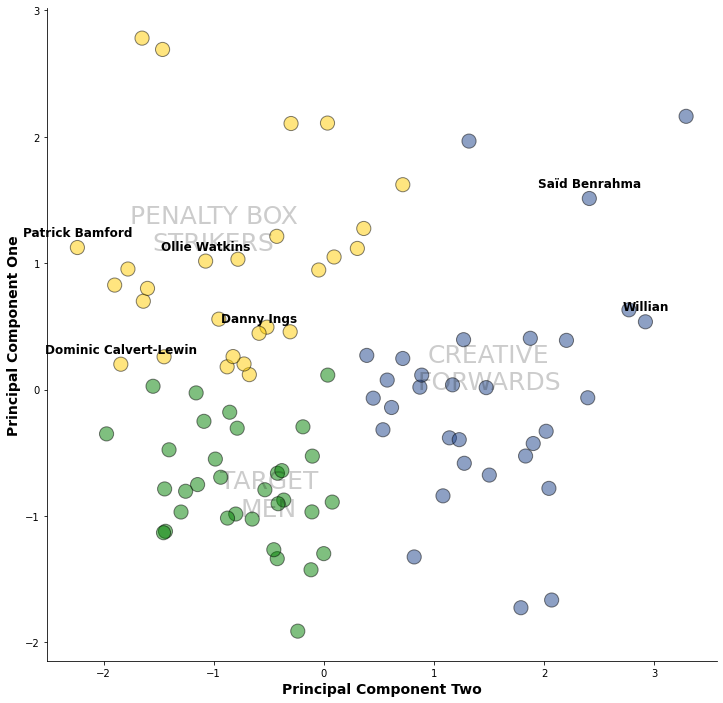

In [62]:
fig, ax = plt.subplots(figsize=(12,12))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

clr = {0:'#1D428A', 1:'#FFCD00', 2:'green'}

# ax.scatter(def_o['y'], def_o['x'], s=200, facecolors='#E3E3E3', edgecolors='grey', zorder=2, alpha=0.8)
ax.scatter(transformed['x'], transformed['y'], s=200, c=transformed['cluster'].apply(lambda x: clr[x]), zorder=2,
           edgecolors='black', linewidths=1,alpha=0.5)

dx, dy = transformed.x.values, transformed.y.values
for i in range(len(transformed)):
    if transformed.name.iloc[i] == "Willian":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Saïd Benrahma":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Patrick Bamford":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Danny Ings":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Ollie Watkins":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)
    elif transformed.name.iloc[i] == "Dominic Calvert-Lewin":
        ax.text(dx[i],dy[i]+0.09,transformed.name.iloc[i],ha="center",color="black",zorder=6,fontweight="bold",fontsize=12)




ax.text(-0.5,-1, 'TARGET\nMEN', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(-1,1.1, 'PENALTY BOX\nSTRIKERS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')
ax.text(1.5,0, 'CREATIVE\nFORWARDS', color='black', fontsize=25, alpha=0.2,horizontalalignment='center')

# Label axis
ax.set_ylabel("Principal Component One",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Principal Component Two",fontsize=14,fontweight="bold",color="black");

plt.savefig("PCA_att", dip=500, bbox_inches='tight',transparent=True)

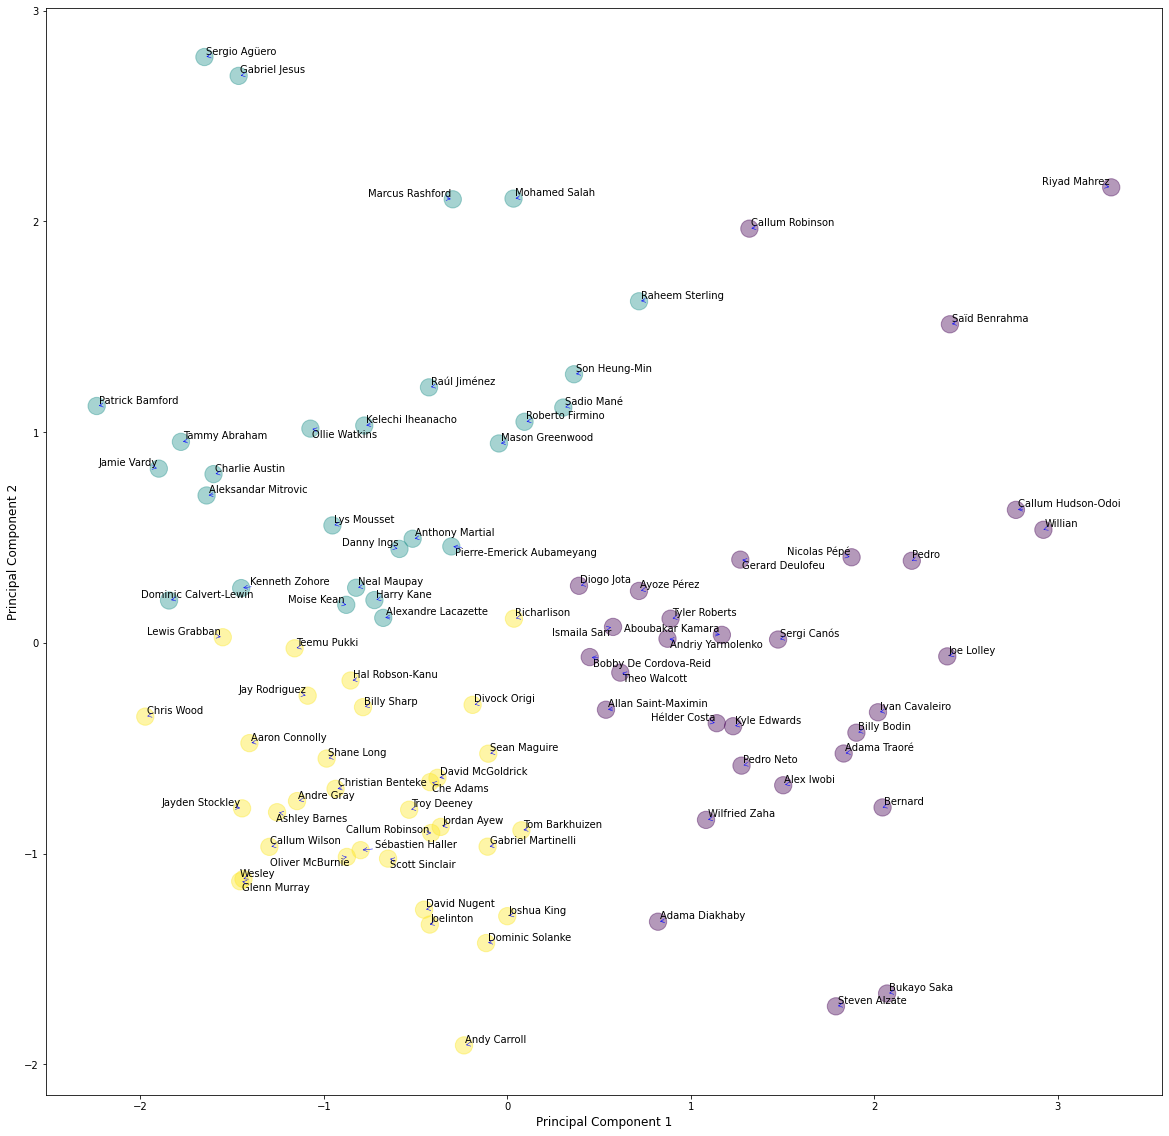

In [57]:
fig, ax = plt.subplots(figsize=(20,20))

v = transformed['cluster']

ax.scatter(transformed['x'], transformed['y'], s=300, c=v, zorder=2, alpha=0.4)

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.name):
    texts.append(plt.text(x, y, s))
adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='b', lw=0.5));

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# ax.savefig("def_kmeans.jpg");